<a href="https://colab.research.google.com/github/chinmay29hub/stock-market-analysis/blob/main/rnn_stock_price_multiple_constraint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importing the training set

In [ ]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
my_train=dataset_train.iloc[:,1:]  #creating a numarray that contains the open price of the stock
training_set=my_train.replace(",","",regex=True)

print(training_set)
# print(training_set[0:1,4:5])
# training_set[0:1,4:5]=training_set[0:1,4:5].replace(",","")
# print(training_set[0:1,4:5])

        Open    High     Low   Close    Volume
0     325.25  332.83  324.97  663.59   7380500
1     331.27  333.87  329.08  666.45   5749400
2     329.83  330.75  326.89  657.21   6590300
3     328.34  328.77  323.68  648.24   5405900
4     322.04  322.29  309.46  620.76  11688800
...      ...     ...     ...     ...       ...
1253  790.90  792.74  787.28  789.91    623400
1254  790.68  797.86  787.66  791.55    789100
1255  793.70  794.23  783.20  785.05   1153800
1256  783.33  785.93  778.92  782.79    744300
1257  782.75  782.78  770.41  771.82   1770000

[1258 rows x 5 columns]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))  #all stock prices will be between 0 and 1
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368 0.09640129 0.09044931 0.23757287 0.29525831]
 [0.09701243 0.09834351 0.09823458 0.24151427 0.22993592]
 [0.09433366 0.09251685 0.09408623 0.22878051 0.26361233]
 ...
 [0.95725128 0.95807422 0.95844067 0.40495845 0.04589107]
 [0.93796041 0.94257381 0.95033338 0.40184391 0.02949139]
 [0.93688146 0.93669113 0.93421352 0.38672602 0.07056868]]


### Creating a data structure with 60 timesteps and 1 output

Timesteps:Data structure specifying what the rnn needs to remeber.

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1258): #we will select the first 60 values to predict the first value and so on
  X_train.append(training_set_scaled[i-60:i])  #will put first 60 value in x
  y_train.append(training_set_scaled[i,0])#will put the value we will predict
X_train,y_train=np.array(X_train),np.array(y_train)

#improvement added
# X_train_last_column = X_train[:,-1]
# X_train_min = X_train.min(axis=1)
# X_train_max = X_train.max(axis=1)
# X_diff = X_train_max-X_train_min
# X_train_divided = (X_train-X_train_min[:, np.newaxis] )/X_diff[:, np.newaxis]
# y_train_divided = (y_train-X_train_min )/X_diff



## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor=Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],5)))
regressor.add(Dropout(0.2))

Dropout momentarily (in a batch of input data) switches off some neurons in a layer so that they do not contribute any information or learn any information during those updates, and the onus falls on other active neurons to learn harder and reduce the error.

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = False)) #false as it the last lstm layer
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam' ,loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 122ms/step - loss: 0.0353
Epoch 2/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0042
Epoch 6/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0041
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [ ]:
data_set1=dataset_train.iloc[:,1:]
data_set2=dataset_test.iloc[:,1:]
dataset_total = pd.concat((data_set1, data_set2), axis = 0)
dataset_total=dataset_total.replace(",","",regex=True)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs=inputs.replace(",","",regex=True)
inputs = sc.transform(inputs)
# print(inputs)
# inputs=dataset_test.iloc[:-1,1:]
# 
# inputs=np.asarray(inputs).astype(np.float32)
# inputs=sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
# # X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price=predicted_stock_price*(1/1.86025746e-03)
predicted_stock_price=predicted_stock_price+300

### Visualising the results

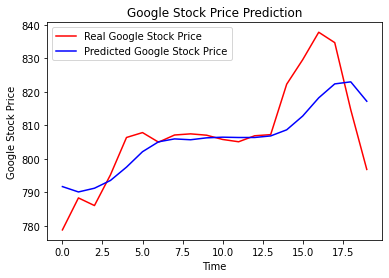

In [ ]:

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

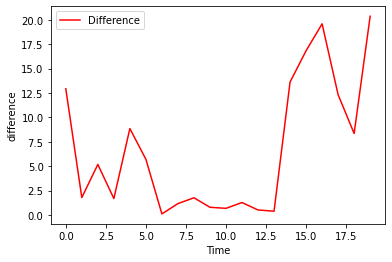

In [ ]:
plt.plot(abs(real_stock_price- predicted_stock_price), color = 'red', label = 'Difference')
plt.xlabel('Time')
plt.ylabel('difference')
plt.legend()
plt.show()

In [ ]:
regressor.save()